In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

In [3]:
df_udemy = pd.read_csv("udemy_courses.csv", encoding="utf-8")

In [4]:
df_udemy.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance


In [5]:
df_udemy["published_timestamp"] = pd.to_datetime(df_udemy["published_timestamp"])

In [6]:
df_udemy["year"] = df_udemy["published_timestamp"].dt.strftime("%Y")

C:\Users\Yanina Lucia\AppData\Local\Temp\ipykernel_7192\699479313.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_udemy["num_lectures"], hist = True) #Densidad es la proporsion de subcriptores de udemy


count    3678.000000
mean       40.108755
std        50.383346
min         0.000000
25%        15.000000
50%        25.000000
75%        45.750000
max       779.000000
Name: num_lectures, dtype: float64

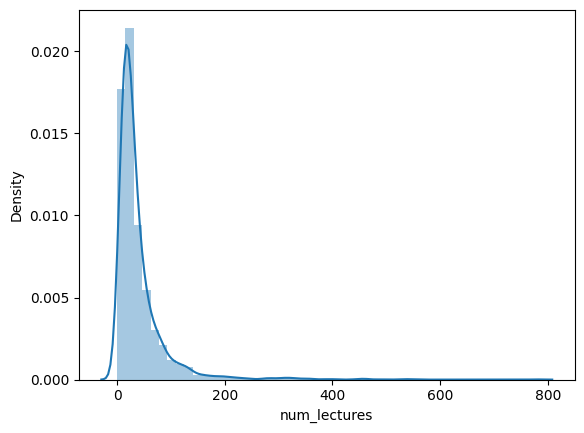

In [7]:
sns.distplot(df_udemy["num_lectures"], hist = True) #Densidad es la proporsion de subcriptores de udemy
df_udemy["num_lectures"].describe()

C:\Users\Yanina Lucia\AppData\Local\Temp\ipykernel_7192\1474751505.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_udemy["content_duration"], hist = True) #Densidad es la proporsion de subcriptores de udemy


count    3678.000000
mean        4.094517
std         6.053840
min         0.000000
25%         1.000000
50%         2.000000
75%         4.500000
max        78.500000
Name: content_duration, dtype: float64

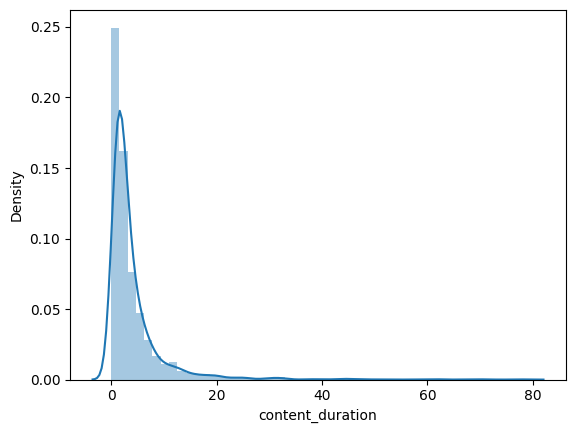

In [8]:
sns.distplot(df_udemy["content_duration"], hist = True) #Densidad es la proporsion de subcriptores de udemy
df_udemy["content_duration"].describe()

In [9]:
df_udemy[["price", "num_subscribers", "num_reviews", "num_lectures", "content_duration"]].corr()

,price,num_subscribers,num_reviews,num_lectures,content_duration
price,1.000000,0.050769,0.113696,0.330160,0.293450
num_subscribers,0.050769,1.000000,0.649946,0.157746,0.161839
num_reviews,0.113696,0.649946,1.000000,0.243029,0.228889
num_lectures,0.330160,0.157746,0.243029,1.000000,0.801647
content_duration,0.293450,0.161839,0.228889,0.801647,1.000000


In [10]:
total_cursos_udeamy = len(df_udemy)
print("Total de cursos de Udemy: ", total_cursos_udeamy)

Total de cursos de Udemy:  3678


In [11]:
lanzamientos_de_cursos = df_udemy["year"].value_counts().sort_index()
print("Año de lanzamientos de los cursos")
print(lanzamientos_de_cursos)

Año de lanzamientos de los cursos
2011       5
2012      45
2013     202
2014     491
2015    1014
2016    1206
2017     715
Name: year, dtype: int64


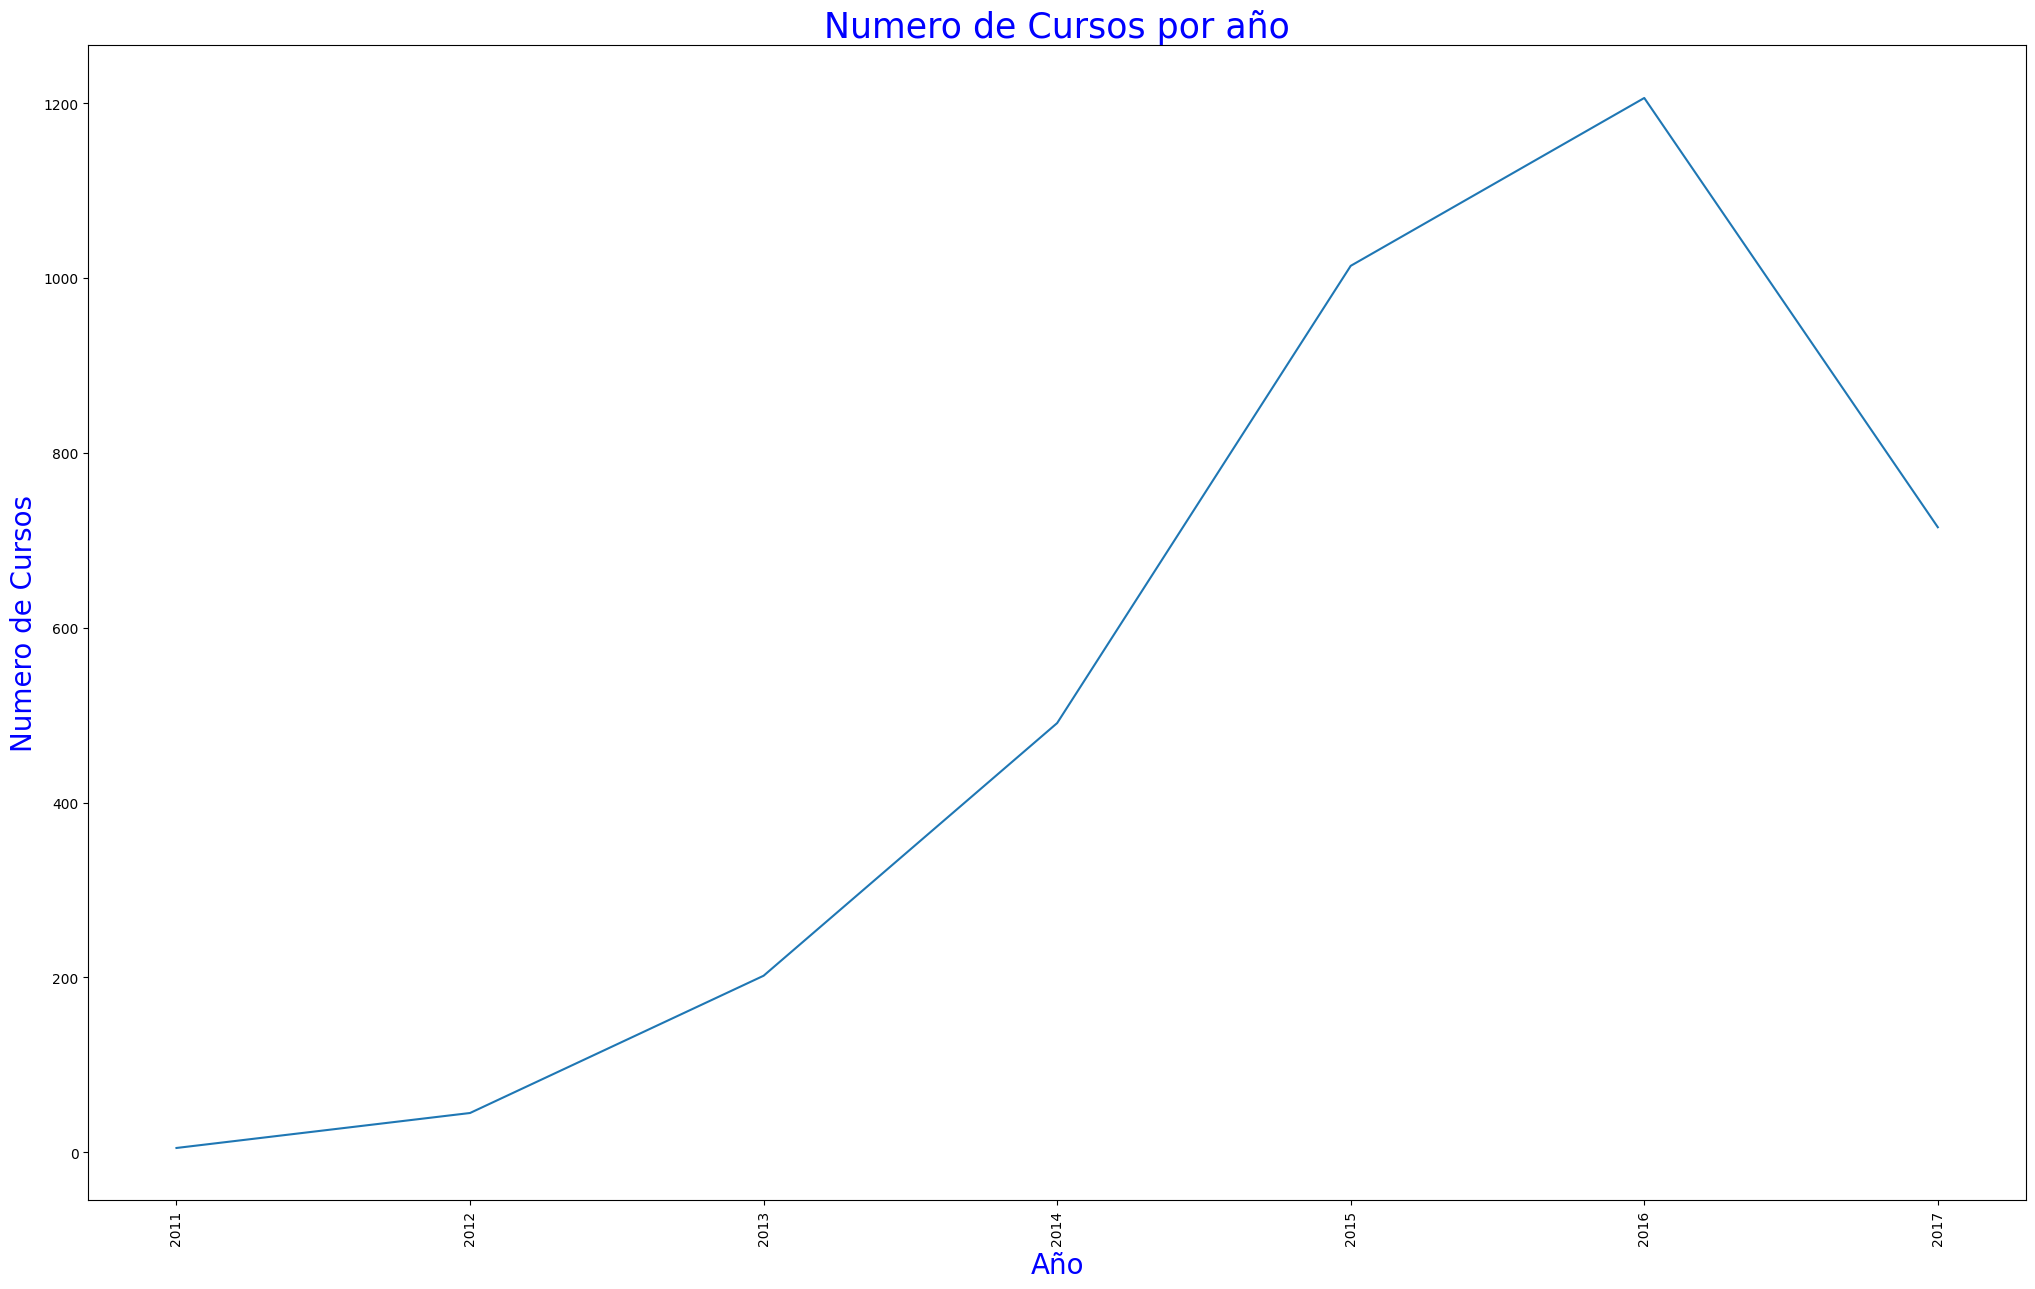

In [12]:
plt.figure(figsize=(25, 15))
sns.lineplot(lanzamientos_de_cursos)
plt.xticks(rotation = "vertical")
plt.xlabel("Año", fontsize = 20, color = "blue")
plt.ylabel("Numero de Cursos", fontsize = 20, color = "blue")
plt.title("Numero de Cursos por año", fontsize = 25, color = "blue")
plt.show()

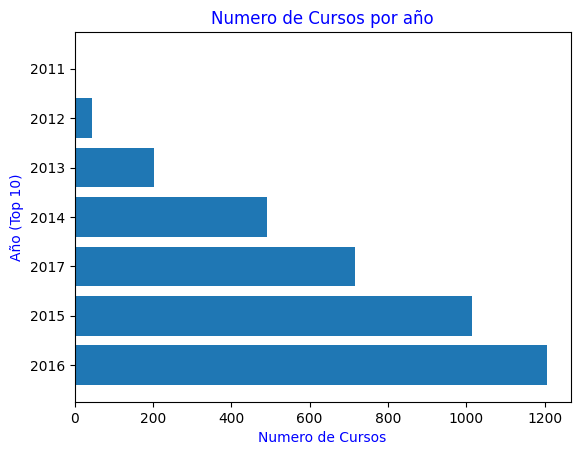

In [13]:
top_10_categorias = lanzamientos_de_cursos.sort_values(ascending=False).head(10)
plt.barh(top_10_categorias.index, top_10_categorias.values)
plt.xlabel("Numero de Cursos", color = "blue")
plt.ylabel("Año (Top 10)", color = "blue")
plt.title("Numero de Cursos por año", color = "blue")
plt.show()

In [14]:
cursos_por_tipo = df_udemy["subject"].value_counts().sort_values(ascending=False).head(10)
print("Tipos de Cursos: ")
print(cursos_por_tipo)

Tipos de Cursos: 
Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64


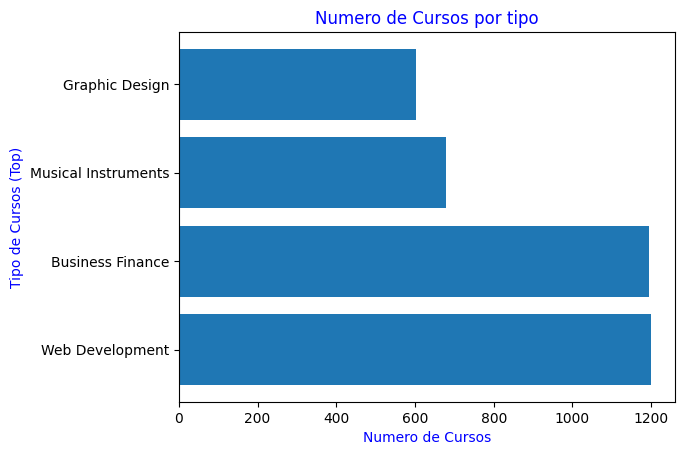

In [15]:
top_10_categorias = cursos_por_tipo.sort_values(ascending=False).head(10)
plt.barh(top_10_categorias.index, top_10_categorias.values)
plt.xlabel("Numero de Cursos", color = "blue")
plt.ylabel("Tipo de Cursos (Top)", color = "blue")
plt.title("Numero de Cursos por tipo", color = "blue")
plt.show()

In [16]:
cursos_por_nivel = df_udemy["level"].value_counts().sort_values(ascending=False).head(10)
print("Cursos por nivel: ")
print(cursos_por_nivel)

Cursos por nivel: 
All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64


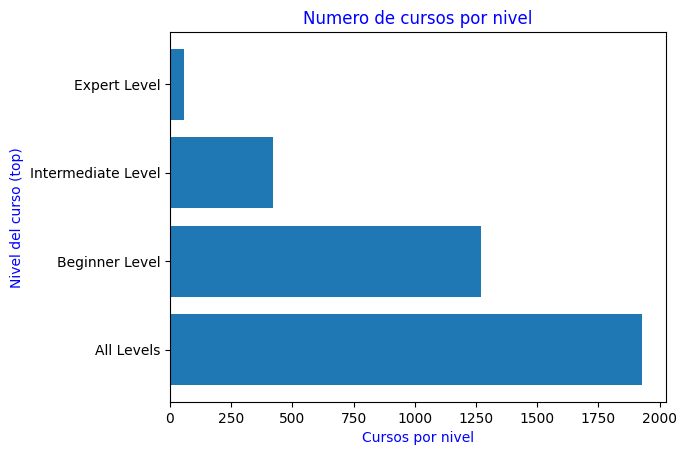

In [17]:
top_10_categorias = cursos_por_nivel.sort_values(ascending=False).head(10)
plt.barh(top_10_categorias.index, top_10_categorias.values)
plt.xlabel("Cursos por nivel", color = "blue")
plt.ylabel("Nivel del curso (top)", color = "blue")
plt.title("Numero de cursos por nivel", color = "blue")
plt.show()

In [18]:
df_udemy["is_paid"] = df_udemy["is_paid"].replace(True, "Pago")
df_udemy["is_paid"] = df_udemy["is_paid"].replace(False, "No Pago")


In [19]:
cursos_pagos_nopagos = df_udemy["is_paid"].value_counts().sort_index(ascending=True).head(20)
print("Cursos pagos y no pagos")
print(cursos_pagos_nopagos)

Cursos pagos y no pagos
No Pago     310
Pago       3368
Name: is_paid, dtype: int64


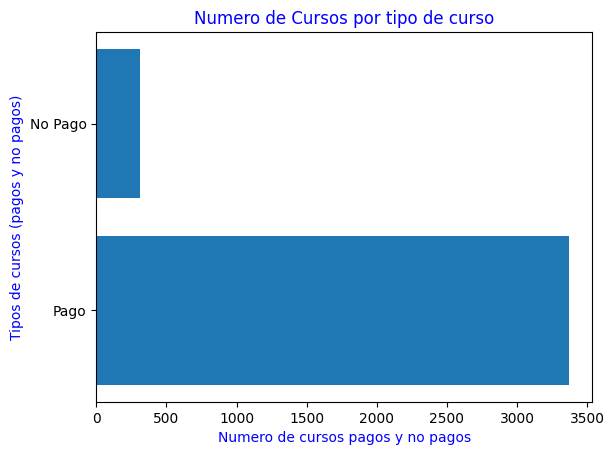

In [20]:
top_10_categorias = cursos_pagos_nopagos.sort_values(ascending=False).head()
plt.barh(top_10_categorias.index, top_10_categorias.values)
plt.xlabel("Numero de cursos pagos y no pagos", color = "blue")
plt.ylabel("Tipos de cursos (pagos y no pagos)", color = "blue")
plt.title("Numero de Cursos por tipo de curso", color = "blue")
plt.show()

calculado como el número de inscriptos en cursos pagados / número de inscriptos en cursos gratuitos * 100

In [21]:
chequeo = df_udemy["num_subscribers"][df_udemy["year"] == 2017]

In [22]:
print(chequeo)

Series([], Name: num_subscribers, dtype: int64)


In [23]:
suscritos_pagos = df_udemy["num_subscribers"][df_udemy["is_paid"] == "Pago"].sum()

In [24]:
inscritos_economia = df_udemy["num_subscribers"][df_udemy["subject"] == "Business Finance"].sum()
print(inscritos_economia)

1868711


In [25]:
inscritos_musica = df_udemy["num_subscribers"][df_udemy["subject"] == "Musical Instruments"].sum()
print(inscritos_musica)

846689


In [26]:
inscritos_grafico = df_udemy["num_subscribers"][df_udemy["subject"] == "Graphic Design"].sum()
print(inscritos_grafico)

1063148


In [27]:
inscritos_web = df_udemy["num_subscribers"][df_udemy["subject"] == "Web Development"].sum()
print(inscritos_web)

7980572


In [28]:
costos = df_udemy["price"].value_counts().head(20)
print("costos")
print(costos)

costos
20     830
50     468
0      310
200    295
40     217
30     166
25     154
95     152
100    133
195    127
35     116
150     88
45      83
75      81
60      75
120     37
55      35
85      31
125     30
65      30
Name: price, dtype: int64


In [29]:
df_udemy.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,Pago,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,Pago,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017


In [30]:
suscritos = df_udemy["num_subscribers"].sum()

In [31]:
#Calculo de KPI que es la "Tasa de conversion de inscritos gratuitos a inscritos pagados"
(suscritos_pagos/suscritos)*100

69.59360054153713

In [32]:
total_inscritos_por_year = df_udemy.groupby("year")["num_subscribers"].sum()

In [33]:
total_inscritos_por_year

year
2011     119028
2012     555339
2013    1723438
2014    1930406
2015    3475324
2016    2966644
2017     988941
Name: num_subscribers, dtype: int64

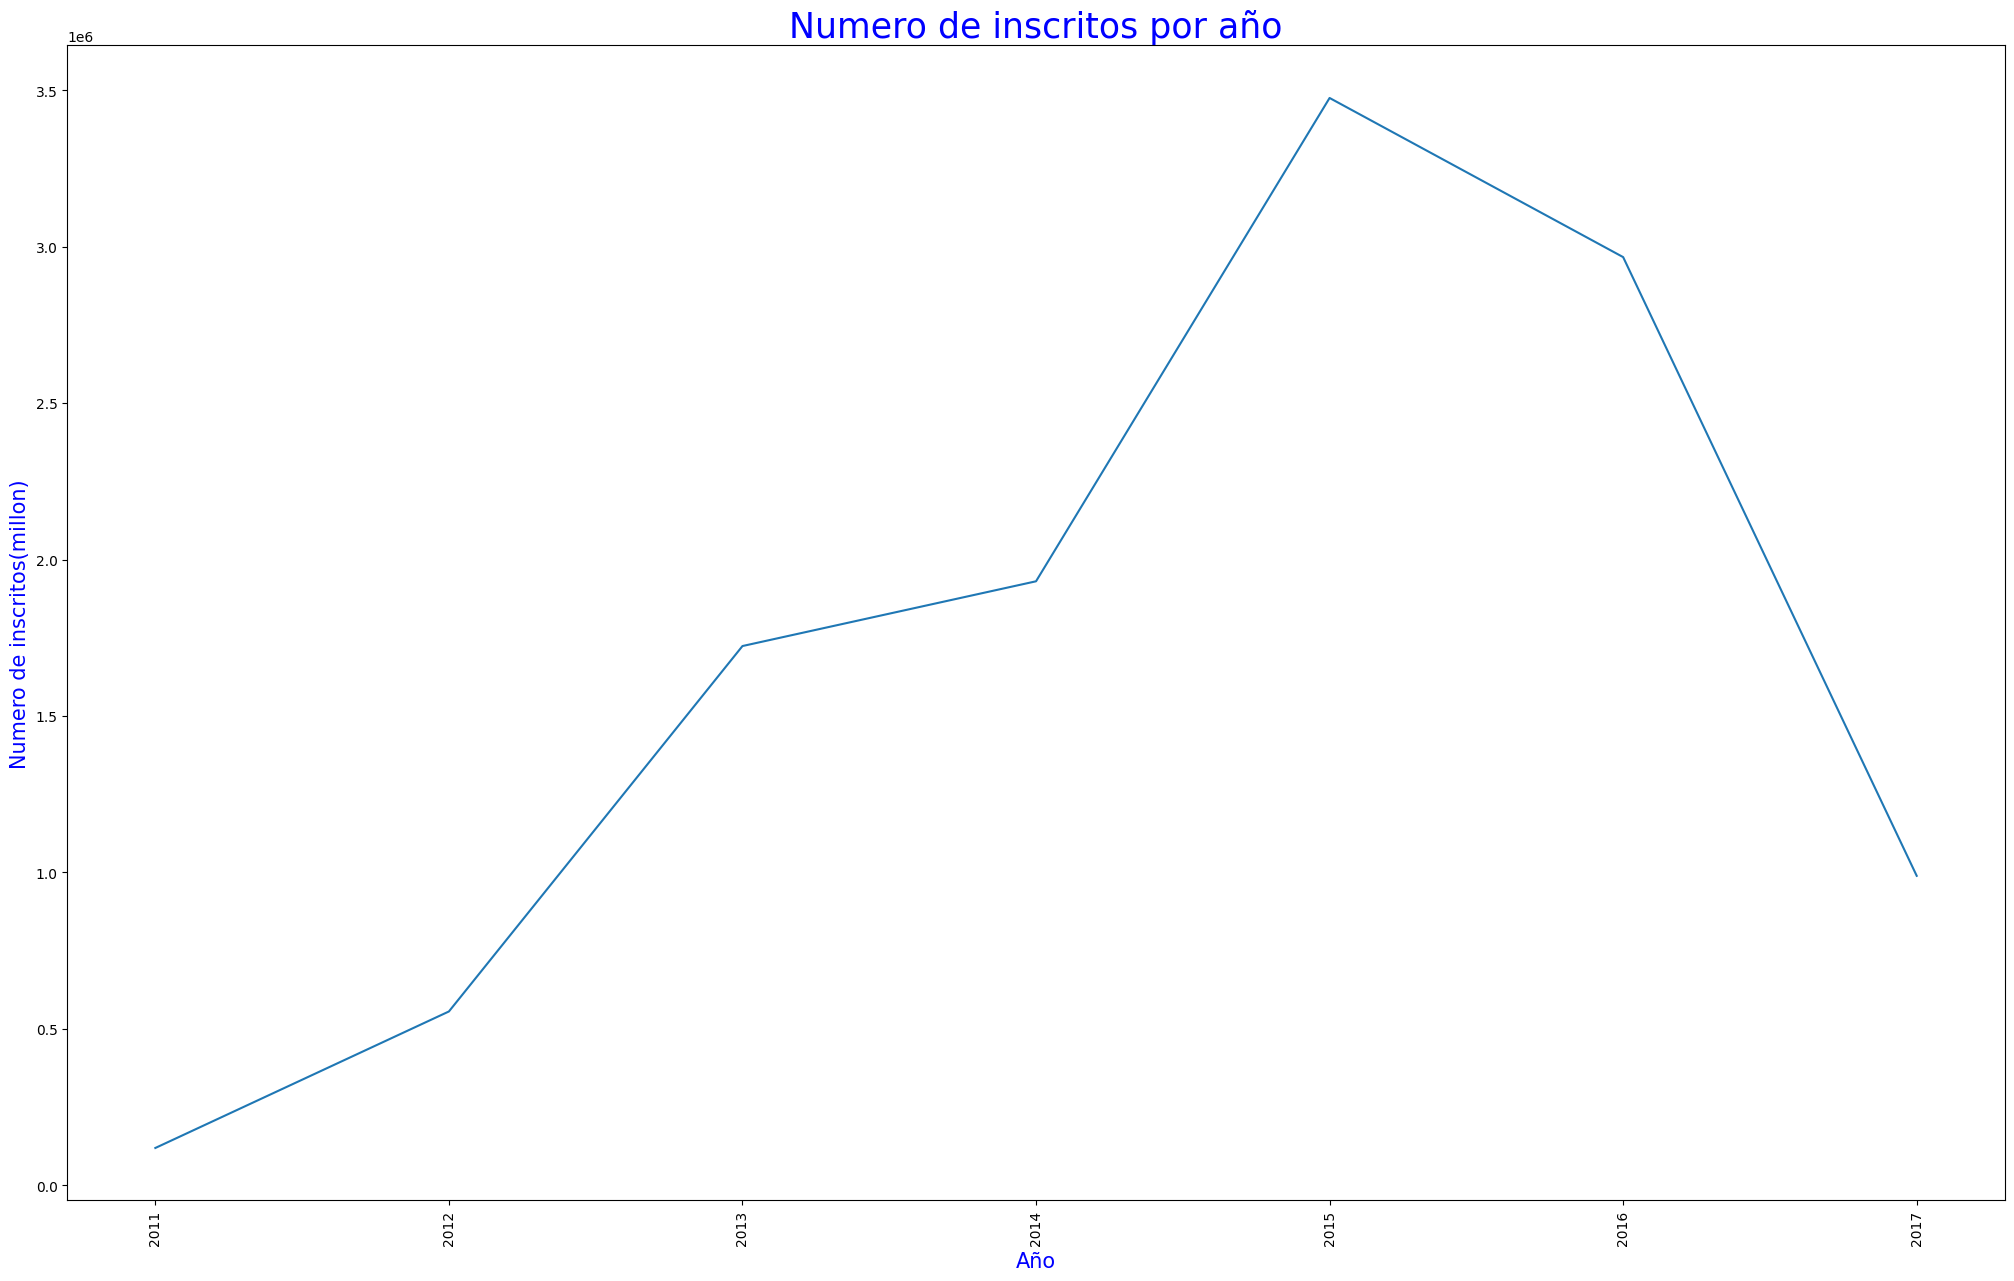

In [34]:
plt.figure(figsize=(25,15))
sns.lineplot(total_inscritos_por_year)
plt.xticks(rotation ="vertical")
plt.xlabel("Año", fontsize = 15, color = "blue")
plt.ylabel("Numero de inscritos(millon)", fontsize = 15, color = "blue")
plt.title("Numero de inscritos por año", fontsize = 25, color = "blue")
plt.show()

In [35]:
df_udemy.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
year                   0
dtype: int64

In [36]:
df_udemy.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
year                   0
dtype: int64

In [37]:
stopwords = STOPWORDS

In [38]:
df_udemy["course_title"] = df_udemy["course_title"].astype("str")

In [39]:
title_corpus = " ".join(df_udemy["course_title"])

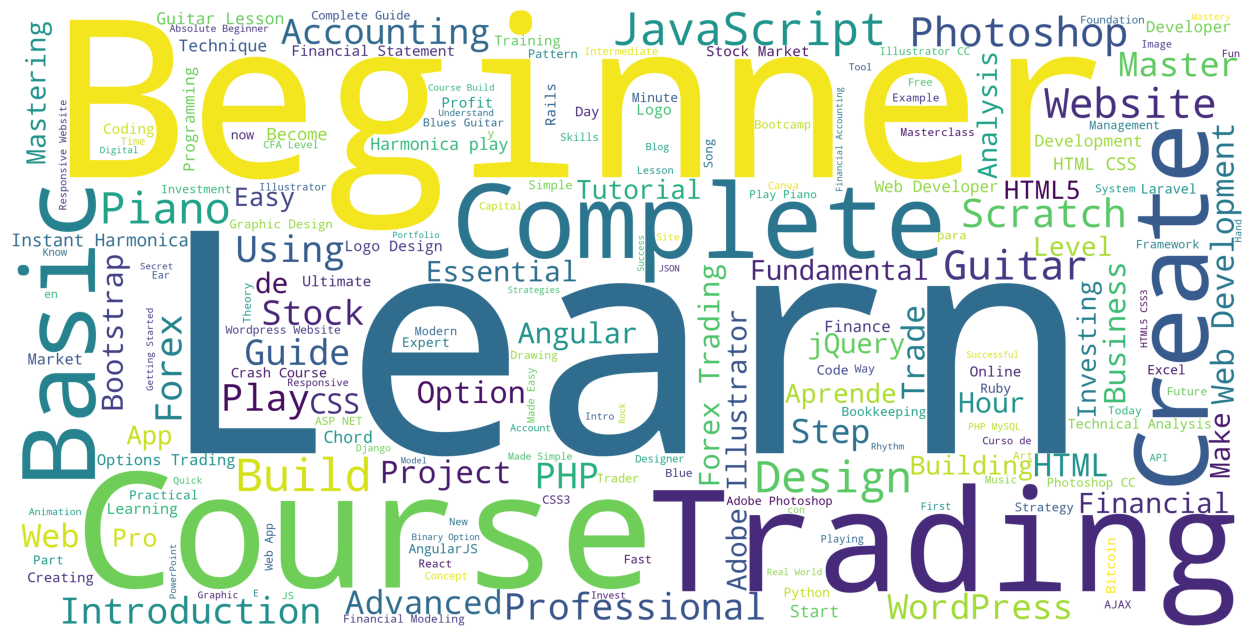

In [40]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis("off")
plt.show()

EDX CURSOS

In [41]:
df_edx = pd.read_csv("edx_courses.csv", encoding="utf-8")

In [42]:
df_edx.head(2)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...


In [43]:
df_edx["summary"] = df_edx["summary"].fillna("Sin Dato")
df_edx["n_enrolled"] = df_edx["n_enrolled"].fillna("0")
df_edx["instructors"] = df_edx["instructors"].fillna("Sin Dato")
df_edx["subtitles"] = df_edx["subtitles"].fillna("Sin Dato")
df_edx["course_description"] = df_edx["course_description"].fillna("Sin Dato")
df_edx["course_syllabus"] = df_edx["course_syllabus"].fillna("Sin Dato")

In [44]:
df_edx["n_enrolled"] = df_edx["n_enrolled"].str.replace("," , "")

In [45]:
df_edx["n_enrolled"] = df_edx["n_enrolled"].astype("int")

In [46]:
df_edx.head(2)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,Sin Dato,https://www.edx.org/course/programming-for-eve...


In [47]:
instituciones = df_edx["institution"].value_counts().head(10)
print("instituciones que departen los curso: ")
print(instituciones)

instituciones que departen los curso: 
Harvard University                       104
Universitat Politècnica de Valencia       47
Massachusetts Institute of Technology     41
Delft University of Technology            30
IBM                                       30
Inter-American Development Bank           29
The University of Queensland              26
The University of Michigan                22
Tecnológico de Monterrey                  21
Columbia University                       20
Name: institution, dtype: int64


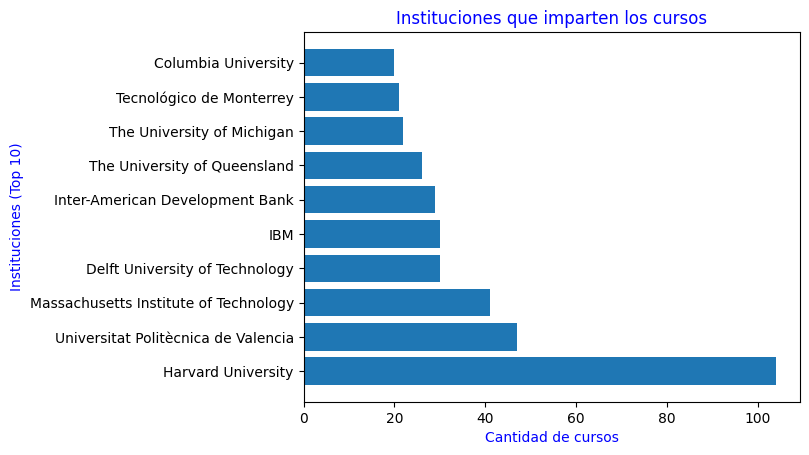

In [48]:
top_10_categorias = instituciones.sort_values(ascending=False).head(10)
plt.barh(top_10_categorias.index, top_10_categorias.values)
plt.xlabel("Cantidad de cursos", color = "blue")
plt.ylabel("Instituciones (Top 10)", color = "blue")
plt.title("Instituciones que imparten los cursos", color = "blue")
plt.show()

In [49]:
print("Cantidad de personas inscritas:", df_edx["n_enrolled"].sum())

Cantidad de personas inscritas: 45537600


In [50]:
cursos_inscritos = df_edx["subject"].value_counts().head(10)
print("Inscritos por curso: ")
print(cursos_inscritos)

Inscritos por curso: 
Computer Science              166
Business & Management         164
Data Analysis & Statistics     72
Humanities                     64
Engineering                    58
Social Sciences                51
Economics & Finance            46
Communication                  39
Biology & Life Sciences        35
Language                       34
Name: subject, dtype: int64


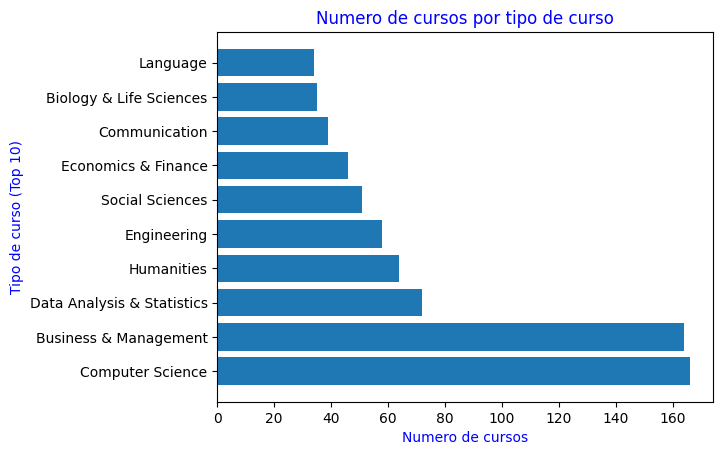

In [51]:
top_10_categorias = cursos_inscritos.sort_values(ascending=False).head(10)
plt.barh(top_10_categorias.index, top_10_categorias.values)
plt.xlabel("Numero de cursos", color = "blue")
plt.ylabel("Tipo de curso (Top 10)", color = "blue")
plt.title("Numero de cursos por tipo de curso", color = "blue")
plt.show()

In [52]:
nivel_de_cursos = df_edx["Level"].value_counts().head()
print("Nivel de los curso: ")
print(nivel_de_cursos)

Nivel de los curso: 
Introductory    621
Intermediate    267
Advanced         87
Name: Level, dtype: int64


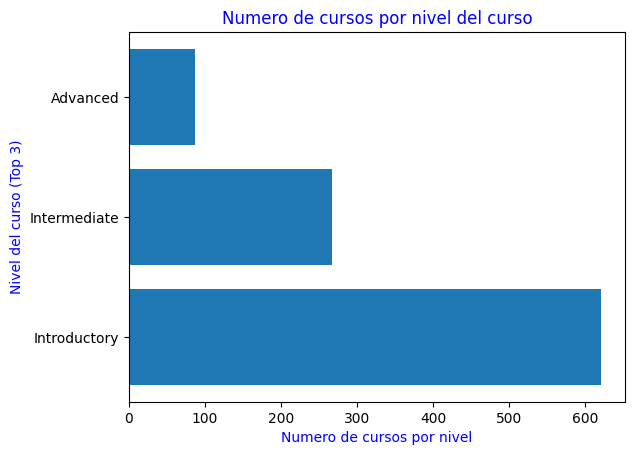

In [53]:
top_10_categorias = nivel_de_cursos.sort_values(ascending=False).head(10)
plt.barh(top_10_categorias.index, top_10_categorias.values)
plt.xlabel("Numero de cursos por nivel", color = "blue")
plt.ylabel("Nivel del curso (Top 3)", color = "blue")
plt.title("Numero de cursos por nivel del curso", color = "blue")
plt.show()

In [54]:
df_edx.isna().sum()

title                 0
summary               0
n_enrolled            0
course_type           0
institution           0
instructors           0
Level                 0
subject               0
language              0
subtitles             0
course_effort         0
course_length         0
price                 0
course_description    0
course_syllabus       0
course_url            0
dtype: int64

In [55]:
df_edx.isnull().sum()

title                 0
summary               0
n_enrolled            0
course_type           0
institution           0
instructors           0
Level                 0
subject               0
language              0
subtitles             0
course_effort         0
course_length         0
price                 0
course_description    0
course_syllabus       0
course_url            0
dtype: int64

In [56]:
df_edx["title"] = df_edx["title"].astype("str")

In [57]:
title_corpus_2 = " ".join(df_edx["title"])

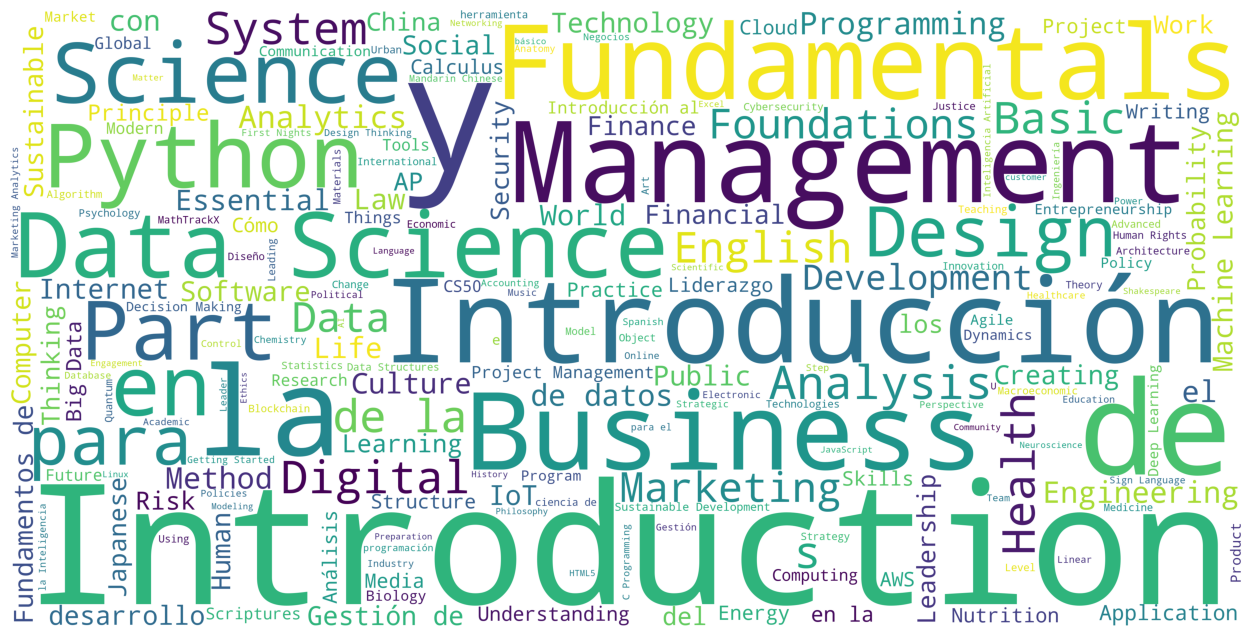

In [58]:
title_wordcloud_2 = WordCloud(stopwords=STOPWORDS, background_color="white", height=2000, width=4000).generate(title_corpus_2)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud_2)
plt.axis("off")
plt.show()

C:\Users\Yanina Lucia\AppData\Local\Temp\ipykernel_7192\326635465.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_edx["n_enrolled"], hist = True)


,n_enrolled
count,9.750000e+02
mean,4.670523e+04
std,1.128239e+05
min,0.000000e+00
25%,8.529500e+03
50%,1.968700e+04
75%,4.891850e+04
max,2.442271e+06


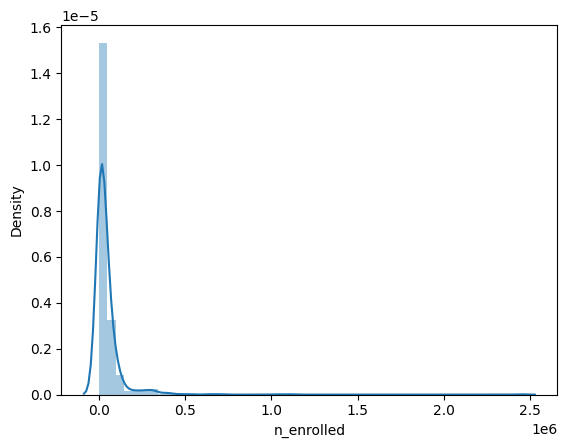

In [59]:
sns.distplot(df_edx["n_enrolled"], hist = True)
df_edx.describe()

COURSERA CURSOS

In [60]:
df_cour = pd.read_csv("Coursera_courses.csv", encoding = "utf-8")

In [61]:
df_cour.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [62]:
df_cour["name"] = df_cour["name"].astype("str")

In [63]:
name_corpus = " ".join(df_cour["name"])

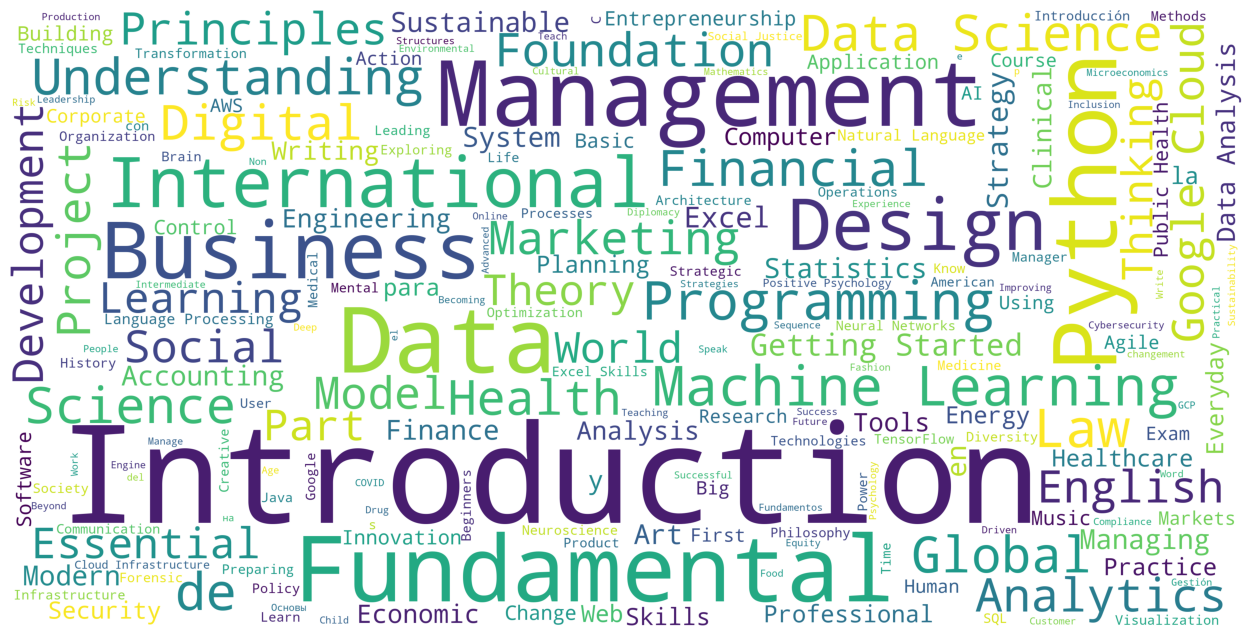

In [64]:
title_wordcloud_2 = WordCloud(stopwords=STOPWORDS, background_color="white", height=2000, width=4000).generate(name_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud_2)
plt.axis("off")
plt.show()

In [65]:
df_cour.head(10)

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training
5,Financial Markets,Yale University,https://www.coursera.org/learn/financial-marke...,financial-markets-global
6,Introduction to Psychology,Yale University,https://www.coursera.org/learn/introduction-ps...,introduction-psychology
7,Programming for Everybody (Getting Started wit...,University of Michigan,https://www.coursera.org/learn/python,python
8,The Bits and Bytes of Computer Networking,Google,https://www.coursera.org/learn/computer-networ...,computer-networking
9,AI For Everyone,DeepLearning.AI,https://www.coursera.org/learn/ai-for-everyone,ai-for-everyone


In [66]:
cursos_por_instituciones = df_cour["institution"].value_counts().head(10)
print("Cursos por institucion: ")
print(cursos_por_instituciones)

Cursos por institucion: 
University of Pennsylvania                    43
University of Michigan                        31
Duke University                               24
Google Cloud                                  22
IBM                                           18
Stanford University                           18
University of Illinois at Urbana-Champaign    17
University of Virginia                        17
Yale University                               17
DeepLearning.AI                               16
Name: institution, dtype: int64


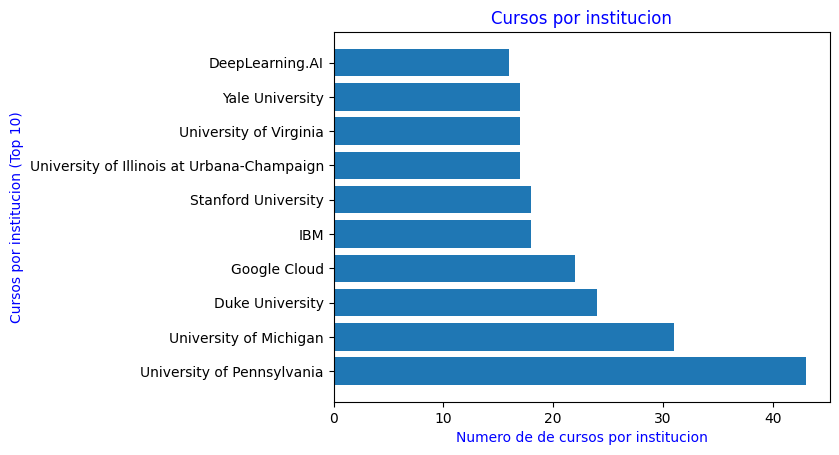

In [67]:
top_10_categorias = cursos_por_instituciones.sort_values(ascending=False).head(10)
plt.barh(top_10_categorias.index, top_10_categorias.values)
plt.xlabel("Numero de de cursos por institucion", color = "blue")
plt.ylabel("Cursos por institucion (Top 10)", color = "blue")
plt.title("Cursos por institucion", color = "blue")
plt.show()

In [68]:
df_udemy.to_csv("Udemy_con_EDA.csv", index=False)

In [69]:
df_edx.to_csv("Edx_con_EDA.csv", index=False)